## Dataset Visualization
# Test split to 0.10% and PCA performed

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC  ## Import SVC
from sklearn import svm
from sklearn.metrics import f1_score
from pandas.plotting import scatter_matrix
import sklearn.linear_model as skl_lm
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
%matplotlib inline  
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

accent_dataset = pd.read_csv("accent-mfcc-data-1.csv")
#collect datatset

In [7]:
accent_dataset.head(330)  
##look at the rows sprcified in head() using the DataFrame’s head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [8]:
#******** dataset cleaning *************
accent_dataset_clean = accent_dataset.dropna() #drop rows which have nan data  
print("Sheet-1")
accent_dataset_clean.describe()  ##The describe() method shows a summary of the numerical attributes

Sheet-1


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


In [9]:
accent_dataset_clean.info()
##The info() method is useful to get a quick description of the data, in particular the-
##-total number of rows, and each attribute’s type and number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB



# --- Data Visualization ---


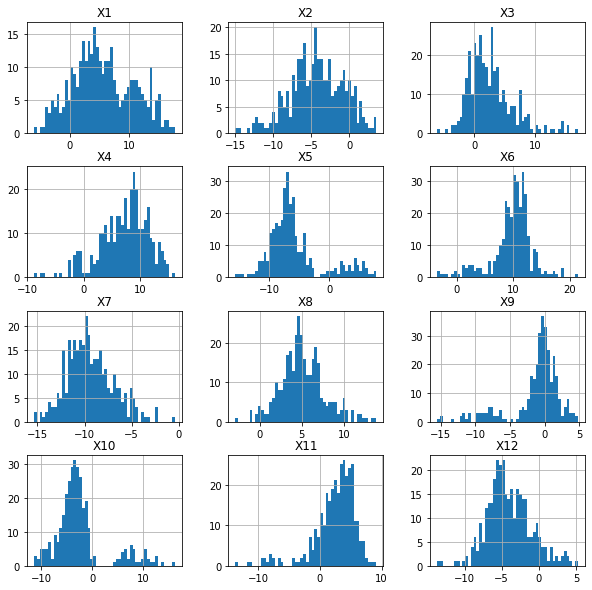

In [10]:
# *****histogram*****
accent_dataset_clean.hist(bins = 50, figsize = (10,10)) #hist for histogram, bin is number of vertical bars in graph
plt.show()

array([[<AxesSubplot:xlabel='X1', ylabel='X1'>,
        <AxesSubplot:xlabel='X2', ylabel='X1'>,
        <AxesSubplot:xlabel='X3', ylabel='X1'>,
        <AxesSubplot:xlabel='X4', ylabel='X1'>,
        <AxesSubplot:xlabel='X5', ylabel='X1'>,
        <AxesSubplot:xlabel='X6', ylabel='X1'>,
        <AxesSubplot:xlabel='X7', ylabel='X1'>,
        <AxesSubplot:xlabel='X8', ylabel='X1'>,
        <AxesSubplot:xlabel='X9', ylabel='X1'>,
        <AxesSubplot:xlabel='X10', ylabel='X1'>,
        <AxesSubplot:xlabel='X11', ylabel='X1'>,
        <AxesSubplot:xlabel='X12', ylabel='X1'>],
       [<AxesSubplot:xlabel='X1', ylabel='X2'>,
        <AxesSubplot:xlabel='X2', ylabel='X2'>,
        <AxesSubplot:xlabel='X3', ylabel='X2'>,
        <AxesSubplot:xlabel='X4', ylabel='X2'>,
        <AxesSubplot:xlabel='X5', ylabel='X2'>,
        <AxesSubplot:xlabel='X6', ylabel='X2'>,
        <AxesSubplot:xlabel='X7', ylabel='X2'>,
        <AxesSubplot:xlabel='X8', ylabel='X2'>,
        <AxesSubplot:xlabel='X9', yl

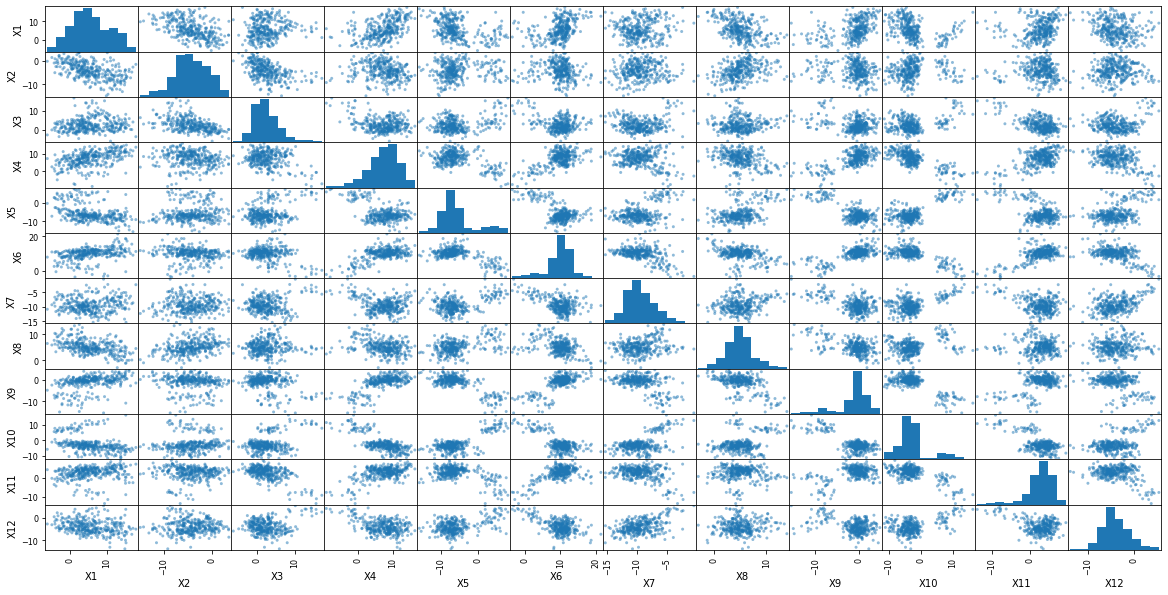

In [11]:
#******* plot scatter matrix ********
from pandas.plotting import scatter_matrix
scatter_matrix(accent_dataset_clean, figsize=(20, 10))

### Box plot

<AxesSubplot:>

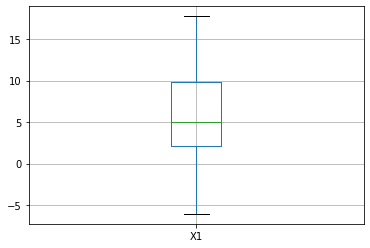

In [12]:
accent_dataset_clean.boxplot(column=['X1']) 


<AxesSubplot:>

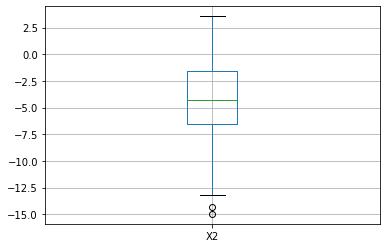

In [13]:
accent_dataset_clean.boxplot(column=['X2']) 


<AxesSubplot:>

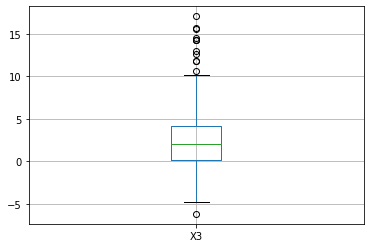

In [14]:
accent_dataset_clean.boxplot(column=['X3']) 


<AxesSubplot:>

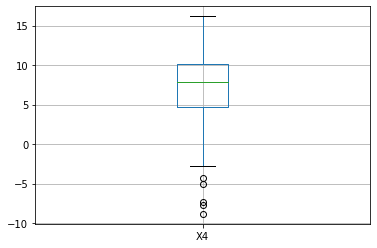

In [15]:
accent_dataset_clean.boxplot(column=['X4']) 


<AxesSubplot:>

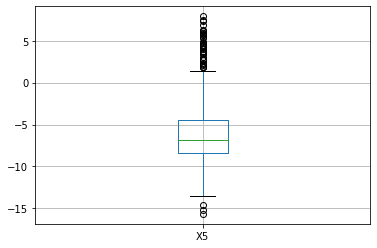

In [16]:
accent_dataset_clean.boxplot(column=['X5']) 


<AxesSubplot:>

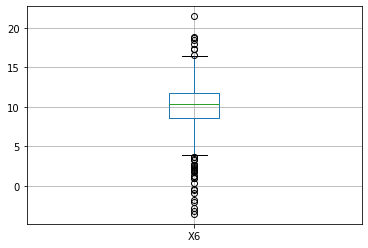

In [17]:
accent_dataset_clean.boxplot(column=['X6']) 


<AxesSubplot:>

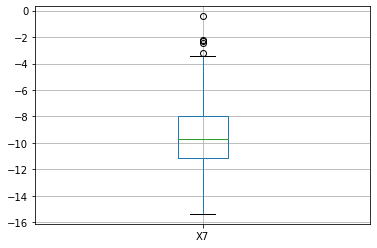

In [18]:
accent_dataset_clean.boxplot(column=['X7']) 


<AxesSubplot:>

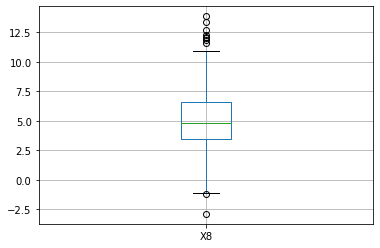

In [19]:
accent_dataset_clean.boxplot(column=['X8']) 


<AxesSubplot:>

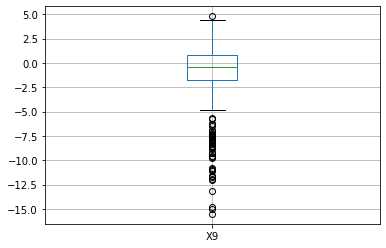

In [20]:
accent_dataset_clean.boxplot(column=['X9']) 


<AxesSubplot:>

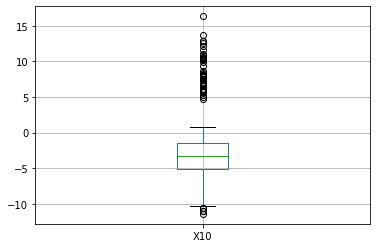

In [21]:
accent_dataset_clean.boxplot(column=['X10']) 


<AxesSubplot:>

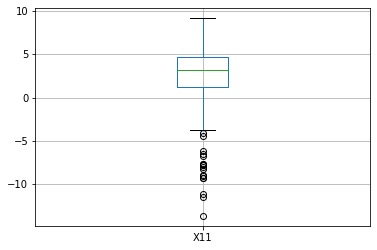

In [22]:
accent_dataset_clean.boxplot(column=['X11']) 


<AxesSubplot:>

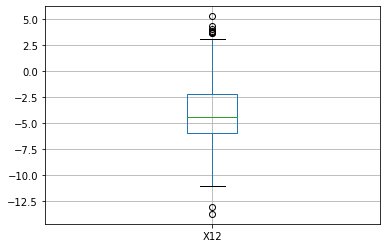

In [23]:
accent_dataset_clean.boxplot(column=['X12']) 


In [24]:
# **********correlation matrix/ heat map ********
corr = accent_dataset_clean.corr()
corr.style.background_gradient(cmap='coolwarm')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
X1,1.000000,-0.516210,0.111992,0.468499,-0.418736,0.368058,0.081495,-0.468839,0.392974,-0.358173,0.164058,-0.237836
X2,-0.516210,1.000000,-0.475168,-0.133245,0.091181,-0.110199,0.052197,0.354930,-0.105822,0.081283,-0.006415,0.021244
X3,0.111992,-0.475168,1.000000,-0.304516,0.325788,-0.321455,0.133902,0.037379,-0.304485,0.370584,-0.597373,0.174310
X4,0.468499,-0.133245,-0.304516,1.000000,-0.518275,0.587991,-0.276286,-0.317395,0.672918,-0.739205,0.560560,-0.435478
X5,-0.418736,0.091181,0.325788,-0.518275,1.000000,-0.602486,0.411764,0.442394,-0.765331,0.738060,-0.526548,0.443376
X6,0.368058,-0.110199,-0.321455,0.587991,-0.602486,1.000000,-0.505647,-0.395979,0.714804,-0.710877,0.630567,-0.535893
X7,0.081495,0.052197,0.133902,-0.276286,0.411764,-0.505647,1.000000,0.216448,-0.527454,0.532713,-0.408103,0.449124
X8,-0.468839,0.354930,0.037379,-0.317395,0.442394,-0.395979,0.216448,1.000000,-0.522148,0.297147,-0.033765,0.059785
X9,0.392974,-0.105822,-0.304485,0.672918,-0.765331,0.714804,-0.527454,-0.522148,1.000000,-0.759978,0.497700,-0.407227
X10,-0.358173,0.081283,0.370584,-0.739205,0.738060,-0.710877,0.532713,0.297147,-0.759978,1.000000,-0.673149,0.444235


US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64


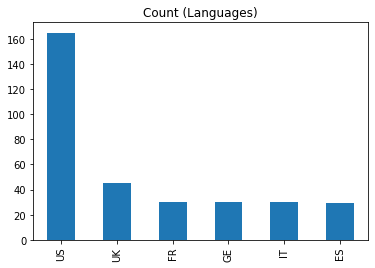

In [25]:
# ****** different langauges values represted in graphical from *******
print(accent_dataset_clean.language.value_counts())
accent_dataset_clean.language.value_counts().plot(kind='bar', title='Count (Languages)');

# --- Model Development ---

# Train data and Test Data split to 90% and 10% and PCA performed

In [33]:
accent_dataset_clean['isUS'] = [True if l == 'US' else False for l in accent_dataset_clean['language']]
df_accent = accent_dataset_clean.drop(['X4','X5','X6'], axis = 1)

In [34]:
X = df_accent.drop(['language', 'isUS'], axis=1)
y = df_accent['isUS']
#print(X, y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1) 

# 1) KNN

In [36]:
for i in range(1,10):
        knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=i) 
        knn_clf.fit(X_train ,y_train)
        knn_pred_test = knn_clf.predict(X_test)
        knn_pred_X_train = knn_clf.predict(X_train)
        accuracy_score(y_test, knn_pred_test)
        print("\n Value of neighbors : ", i)
        print(classification_report(y_test, knn_pred_test, target_names = ['Not US','Is US'], digits = 7))
        print("confusion matrix for y train is : ")
        print(confusion_matrix(y_train, knn_pred_X_train))
        print("confusion matrix for y test is : ")
        print(confusion_matrix(y_test, knn_pred_test))
        print("accuracy score for training : ")
        print(accuracy_score(y_train, knn_pred_X_train))
        print("=================================================== \n")
     


 Value of neighbors :  1
              precision    recall  f1-score   support

      Not US  0.7857143 0.6875000 0.7333333        16
       Is US  0.7368421 0.8235294 0.7777778        17

    accuracy                      0.7575758        33
   macro avg  0.7612782 0.7555147 0.7555556        33
weighted avg  0.7605377 0.7575758 0.7562290        33

confusion matrix for y train is : 
[[148   0]
 [  0 148]]
confusion matrix for y test is : 
[[11  5]
 [ 3 14]]
accuracy score for training : 
1.0


 Value of neighbors :  2
              precision    recall  f1-score   support

      Not US  0.8125000 0.8125000 0.8125000        16
       Is US  0.8235294 0.8235294 0.8235294        17

    accuracy                      0.8181818        33
   macro avg  0.8180147 0.8180147 0.8180147        33
weighted avg  0.8181818 0.8181818 0.8181818        33

confusion matrix for y train is : 
[[148   0]
 [ 26 122]]
confusion matrix for y test is : 
[[13  3]
 [ 3 14]]
accuracy score for training : 
0.912

# Observation for KNN:
when test data to train data ration is 1:9, the best accuracy is seen when KNN is calculated with 2,4,5 and 9 neighbors
0.96 accuracy with KNN=8 and 9

# 2) SVM:
Note: We have tried to implement SVM by changing kernel paramter and degree paramter to check the accuracy 

In [37]:
print("===================================================  \n")
print("kernel is liner")
svc_clf = SVC(kernel='linear')
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

print("=================================================== \n")

print("kernel is poly degree is 5")
svc_clf = SVC(kernel='poly', degree=5)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("===================================================  \n")

print("kernel is poly degree changed to 20")
svc_clf = SVC(kernel='poly', degree=20)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("===================================================  \n")

print("kernel is poly degree changed to 8")
svc_clf = SVC(kernel='poly', degree=8)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))
print("===================================================")
print("kernel is rbf")
svc_clf = SVC(kernel='rbf')
svc_clf.fit(X_train, y_train)
svc_pred_gau = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_gau))
print(classification_report(y_test,svc_pred_gau))

print("===================================================")

print("kernel is sigmoid")
svc_clf = SVC(kernel='sigmoid')
svc_clf.fit(X_train, y_train)
svc_pred_sig = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_sig))
print(classification_report(y_test,svc_pred_sig))


kernel is liner
confusion matrix is: 
[[15  1]
 [ 3 14]]
              precision    recall  f1-score   support

       False       0.83      0.94      0.88        16
        True       0.93      0.82      0.87        17

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33


kernel is poly degree is 5
confusion matrix is: 
[[16  0]
 [ 8  9]]
              precision    recall  f1-score   support

       False       0.67      1.00      0.80        16
        True       1.00      0.53      0.69        17

    accuracy                           0.76        33
   macro avg       0.83      0.76      0.75        33
weighted avg       0.84      0.76      0.74        33


kernel is poly degree changed to 20
confusion matrix is: 
[[16  0]
 [ 7 10]]
              precision    recall  f1-score   support

       False       0.70      1.00      0.82        16
        True       1.00      0.5

# observation for SVC:
For SVC when kernel Gaussian (rbf) we are getting maximum accuracy of 0.88


# 3) logistic regression
Note: we have tried changing solver to liblinear and newton-cg to check accuracy

In [38]:
import sklearn.linear_model as skl_lm
log_clf = skl_lm.LogisticRegression(solver='newton-cg')
log_clf.fit(X_train,y_train)
log_pred = log_clf.predict(X_test)
log_pred_train = log_clf.predict(X_train)
accuracy_score(y_test, log_pred)
print(classification_report(y_test,log_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : ", confusion_matrix(y_train, log_pred_train))
print("confusion matrix for y test is : ", confusion_matrix(y_test, log_pred))
print("accuracy score for training : ", accuracy_score(y_train, log_pred_train))

              precision    recall  f1-score   support

      Not US  0.8333333 0.9375000 0.8823529        16
       Is US  0.9333333 0.8235294 0.8750000        17

    accuracy                      0.8787879        33
   macro avg  0.8833333 0.8805147 0.8786765        33
weighted avg  0.8848485 0.8787879 0.8785651        33

confusion matrix for y train is :  [[116  32]
 [ 37 111]]
confusion matrix for y test is :  [[15  1]
 [ 3 14]]
accuracy score for training :  0.7668918918918919


In [39]:
import sklearn.linear_model as skl_lm
log_clf = skl_lm.LogisticRegression(solver='liblinear')
log_clf.fit(X_train,y_train)
log_pred = log_clf.predict(X_test)
log_pred_train = log_clf.predict(X_train)
accuracy_score(y_test, log_pred)
print(classification_report(y_test,log_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : ", confusion_matrix(y_train, log_pred_train))
print("confusion matrix for y test is : ", confusion_matrix(y_test, log_pred))
print("accuracy score for training : ", accuracy_score(y_train, log_pred_train))

              precision    recall  f1-score   support

      Not US  0.8333333 0.9375000 0.8823529        16
       Is US  0.9333333 0.8235294 0.8750000        17

    accuracy                      0.8787879        33
   macro avg  0.8833333 0.8805147 0.8786765        33
weighted avg  0.8848485 0.8787879 0.8785651        33

confusion matrix for y train is :  [[118  30]
 [ 37 111]]
confusion matrix for y test is :  [[15  1]
 [ 3 14]]
accuracy score for training :  0.7736486486486487


# observation for logistic regression:
For logistic regression, accuracy is 0.87 for both newton-cg and liblinear solvers.


# 4) LDA

In [40]:
lda_clf = LinearDiscriminantAnalysis(solver='svd')
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
accuracy_score(y_test, lda_pred)
lda_pred_train = lda_clf.predict(X_train)
print(classification_report(y_test,lda_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : \n", confusion_matrix(y_train, lda_pred_train))
print("confusion matrix for y test is : \n", confusion_matrix(y_test, lda_pred))
print("accuracy score for training : \n", accuracy_score(y_train, lda_pred_train))



              precision    recall  f1-score   support

      Not US  0.8333333 0.9375000 0.8823529        16
       Is US  0.9333333 0.8235294 0.8750000        17

    accuracy                      0.8787879        33
   macro avg  0.8833333 0.8805147 0.8786765        33
weighted avg  0.8848485 0.8787879 0.8785651        33

confusion matrix for y train is : 
 [[118  30]
 [ 42 106]]
confusion matrix for y test is : 
 [[15  1]
 [ 3 14]]
accuracy score for training : 
 0.7567567567567568


# obervation for LDA:
for logistic when test data is reduced to 0.10 accuracy of this model is decreasing compared to to test data equal to 0.20
Accuracy for LDA when test-to-train data split is 1:9 is 0.87

# 5) Decision tree

In [41]:
# ***** without tuning parameter *****
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)
dt_pred_train = dt_clf.predict(X_train)
print(classification_report(y_test,dt_pred, target_names = ['Not US','Is US'], digits = 7))
print("===================================================")
print("confusion matrix for y train is : \n", confusion_matrix(y_train, dt_pred_train))
print("confusion matrix for y test is : \n", confusion_matrix(y_test, dt_pred))
print("accuracy score for training : \n", accuracy_score(y_train, dt_pred_train))


              precision    recall  f1-score   support

      Not US  1.0000000 0.8750000 0.9333333        16
       Is US  0.8947368 1.0000000 0.9444444        17

    accuracy                      0.9393939        33
   macro avg  0.9473684 0.9375000 0.9388889        33
weighted avg  0.9457735 0.9393939 0.9390572        33

confusion matrix for y train is : 
 [[148   0]
 [  0 148]]
confusion matrix for y test is : 
 [[14  2]
 [ 0 17]]
accuracy score for training : 
 1.0


# observation for decision tree
when test data is equal to 0.10 accuracy of model is increasing to 0.9, when test data is equal to 0.20 accuracy of model is less, 0.77.     
Training accuracy is 1 so it is overfitting

In [42]:
# ****** with tuning parameter *******
for i in range (1, 10):
    print("Value of leaf: ", i)
    dt_clf = DecisionTreeClassifier(min_samples_leaf=i)
    dt_clf.fit(X_train,y_train)
    dt_pred = dt_clf.predict(X_test)
    accuracy_score(y_test, dt_pred)
    dt_pred_train = dt_clf.predict(X_train)
    print(classification_report(y_test,dt_pred, target_names = ['Not US','Is US'], digits = 7))
    print("===================================================")
    print("confusion matrix for y train is : \n", confusion_matrix(y_train, dt_pred_train))
    print("confusion matrix for y test is : \n", confusion_matrix(y_test, dt_pred))
    print("accuracy score for training : \n", accuracy_score(y_train, dt_pred_train))
    print("===================================================  \n")


Value of leaf:  1
              precision    recall  f1-score   support

      Not US  0.8235294 0.8750000 0.8484848        16
       Is US  0.8750000 0.8235294 0.8484848        17

    accuracy                      0.8484848        33
   macro avg  0.8492647 0.8492647 0.8484848        33
weighted avg  0.8500446 0.8484848 0.8484848        33

confusion matrix for y train is : 
 [[148   0]
 [  0 148]]
confusion matrix for y test is : 
 [[14  2]
 [ 3 14]]
accuracy score for training : 
 1.0

Value of leaf:  2
              precision    recall  f1-score   support

      Not US  0.7777778 0.8750000 0.8235294        16
       Is US  0.8666667 0.7647059 0.8125000        17

    accuracy                      0.8181818        33
   macro avg  0.8222222 0.8198529 0.8180147        33
weighted avg  0.8235690 0.8181818 0.8178476        33

confusion matrix for y train is : 
 [[145   3]
 [  9 139]]
confusion matrix for y test is : 
 [[14  2]
 [ 4 13]]
accuracy score for training : 
 0.9594594594594

# observation for decision tree
we are getting best accuracy when number of leafs are equal to 7 i.e. of 0.93
It is 0.86 when test-to-train data is split in 1:9 ratio and number of leafs = 6

# 6 svm.SVC

In [43]:
from sklearn.svm import SVC
print("===================================================  \n")
print("kernel is liner")
svc_clf = svm.SVC(kernel='linear')
svc_clf.fit(X_train, y_train)
svc_pred = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

print("=================================================== \n")

print("kernel is poly degree is 5")
svc_clf = svm.SVC(kernel='poly', degree=5)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("===================================================  \n")

print("kernel is poly degree changed to 20")
svc_clf = svm.SVC(kernel='poly', degree=20)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))

print("===================================================  \n")

print("kernel is poly degree changed to 8")
svc_clf = svm.SVC(kernel='poly', degree=8)
svc_clf.fit(X_train, y_train)
svc_pred_poly = svc_clf.predict(X_test)
print("confusion matrix is: ")
print(confusion_matrix(y_test,svc_pred_poly))
print(classification_report(y_test,svc_pred_poly))
print("===================================================")
print("kernel is rbf")
svc_clf = svm.SVC(kernel='rbf')
svc_clf.fit(X_train, y_train)
svc_pred_gau = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_gau))
print(classification_report(y_test,svc_pred_gau))

print("===================================================")

print("kernel is sigmoid")
svc_clf = svm.SVC(kernel='sigmoid')
svc_clf.fit(X_train, y_train)
svc_pred_sig = svc_clf.predict(X_test)
print(confusion_matrix(y_test,svc_pred_sig))
print(classification_report(y_test,svc_pred_sig))


kernel is liner
confusion matrix is: 
[[15  1]
 [ 3 14]]
              precision    recall  f1-score   support

       False       0.83      0.94      0.88        16
        True       0.93      0.82      0.87        17

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33


kernel is poly degree is 5
confusion matrix is: 
[[16  0]
 [ 8  9]]
              precision    recall  f1-score   support

       False       0.67      1.00      0.80        16
        True       1.00      0.53      0.69        17

    accuracy                           0.76        33
   macro avg       0.83      0.76      0.75        33
weighted avg       0.84      0.76      0.74        33


kernel is poly degree changed to 20
confusion matrix is: 
[[16  0]
 [ 7 10]]
              precision    recall  f1-score   support

       False       0.70      1.00      0.82        16
        True       1.00      0.5

# SVM Observations - 
Best accuracy of 0.88 is observed with linear kernel and with Gaussian

# AOC - ROC

AOC for Logistic Regression is : 0.9779411764705882
AOC for KNN is :  0.9963235294117647
AOC for LDA is :  0.9889705882352942
AOC for SVM is :  0.9816176470588235
AOC for Decision Tree is :  0.9779411764705883


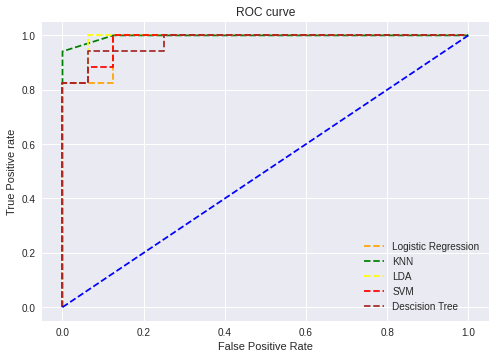

In [45]:
# logistic regression
model1 = LogisticRegression(solver='liblinear')
# knn
model2 = KNeighborsClassifier(n_neighbors=8)
# LDA
model3 = LinearDiscriminantAnalysis()
#SVM

model4 = svm.SVC(kernel='rbf', probability = True)
model5 = DecisionTreeClassifier(min_samples_leaf=6)

#probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])

print("AOC for Logistic Regression is :", auc_score1)
print("AOC for KNN is : ", auc_score2)
print("AOC for LDA is : ", auc_score3)
print("AOC for SVM is : ", auc_score4)
print("AOC for Decision Tree is : ", auc_score5)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='LDA')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='brown', label='Descision Tree')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# Observation
For test_data:train data = 1:9, AOC is highest for LDA with 0.98